In [10]:
import all_other_functions as fun
import os
import numpy as np
import pandas as pd
from tensorflow.python.keras.models import Sequential,load_model
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.metrics import BinaryAccuracy
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


# file location

In [584]:
main_path = "C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\HISTOGRAM_FEATURE_EXTRACTION"

type_of_testing = ["Comptuerd_set","Semi Captured set","Completly internt set"]
size_of_testing = ["large","mid","small"]
algoithm = ["lsb","lsbran","dct"]

#main file name
train_set_file_name = "large_set_histogram_train.pickle"
test_set_file_name = "large_set_histogram_test.pickle"
validation_set_file_name = "large_set_histogram_valid.pickle"

#small file name
testing_file_name = "global_mid_set_test2.pickle"
 
main_type_testing = type_of_testing[2] # change once all one set of testing is done
main_size_of_testing = size_of_testing[0] # change once all type of size is tested
main_algorithm_testing = algoithm[2] # change algorithm first then size then type




# creating the path
type_testing_path = os.path.join(main_path,main_type_testing)
type_of_size_path = os.path.join(type_testing_path,main_size_of_testing)
type_of_algorithm_path = os.path.join(type_of_size_path,main_algorithm_testing)


#train path
train_path = os.path.join(type_of_algorithm_path,train_set_file_name)
#test path
test_path = os.path.join(type_of_algorithm_path,test_set_file_name)
#validation path
valid_path = os.path.join(type_of_algorithm_path,validation_set_file_name)



fun.pathExists(train_path)
fun.pathExists(test_path)
fun.pathExists(valid_path)

print(train_path)
print(test_path)
print(valid_path)




Yes
Yes
Yes
C:\Users\pskavalekar\Desktop\Scripts\DATA\HISTOGRAM_FEATURE_EXTRACTION\Completly internt set\large\dct\large_set_histogram_train.pickle
C:\Users\pskavalekar\Desktop\Scripts\DATA\HISTOGRAM_FEATURE_EXTRACTION\Completly internt set\large\dct\large_set_histogram_test.pickle
C:\Users\pskavalekar\Desktop\Scripts\DATA\HISTOGRAM_FEATURE_EXTRACTION\Completly internt set\large\dct\large_set_histogram_valid.pickle


In [585]:
#small path

small_set_temp_path = os.path.join(type_testing_path,'small')
small_set_temp_path = os.path.join(small_set_temp_path,main_algorithm_testing)
small_path = os.path.join(small_set_temp_path,'global_mid_set.pickle')
fun.pathExists(small_path)
print(small_path)

Yes
C:\Users\pskavalekar\Desktop\Scripts\DATA\HISTOGRAM_FEATURE_EXTRACTION\Completly internt set\small\dct\global_mid_set.pickle


In [586]:
# mid path
mid_set_temp_path = os.path.join(type_testing_path,'mid')
mid_set_temp_path = os.path.join(mid_set_temp_path,main_algorithm_testing)
mid_path = os.path.join(mid_set_temp_path,'large_set_histogram_test.pickle')
fun.pathExists(mid_path)
print(mid_path)

Yes
C:\Users\pskavalekar\Desktop\Scripts\DATA\HISTOGRAM_FEATURE_EXTRACTION\Completly internt set\mid\dct\large_set_histogram_test.pickle


# loading dataset

In [587]:
train_data = fun.readPickledata(filelocation=train_path)
print(len(train_data))
test_data = fun.readPickledata(filelocation=test_path)
print(len(test_data))
valid_data = fun.readPickledata(filelocation=valid_path)
print(len(valid_data))
if os.path.exists(small_path) == True:
    small_data = fun.readPickledata(filelocation=small_path)
    print(len(small_data))
if os.path.exists(mid_path) == True:
    mid_data = fun.readPickledata(filelocation=mid_path)
    print(len(mid_data))

960
120
120
120
120


# train data

In [588]:
X_Train_features = [] # histogram features
Y_Train_labels = [] # labels values 

for feature, label in train_data:
    X_Train_features.append(feature)
    Y_Train_labels.append(label)

X_Train_features = np.array(X_Train_features)
Y_Train_labels = np.array(Y_Train_labels)

print(X_Train_features.shape)
print(Y_Train_labels.shape)

(960, 512)
(960,)


# Test data

In [589]:
X_Test_features = [] # histogram test features
Y_Test_labels = [] # labels values 

for feature, label in test_data:
    X_Test_features.append(feature)
    Y_Test_labels.append(label)

X_Test_features = np.array(X_Test_features)
Y_Test_labels = np.array(Y_Test_labels)

print(X_Test_features.shape)
print(Y_Test_labels.shape)
print(len(X_Test_features))

(120, 512)
(120,)
120


# validation data

In [590]:
X_Valid_features = [] # histogram test features
Y_Valid_labels = [] # labels values 

for feature, label in valid_data:
    X_Valid_features.append(feature)
    Y_Valid_labels.append(label)

X_Valid_features = np.array(X_Valid_features)
Y_Valid_labels = np.array(Y_Valid_labels)

print(X_Valid_features.shape)
print(Y_Valid_labels.shape)

(120, 512)
(120,)


# small test

In [591]:
X_small_Features = [] # histogram test features
Y_small_labels = [] # labels values 

for feature, label in small_data:
    X_small_Features.append(feature)
    Y_small_labels.append(label)

X_small_Features = np.array(X_small_Features)
Y_small_labels = np.array(Y_small_labels)

print(X_small_Features.shape)
print(Y_small_labels.shape)

(120, 512)
(120,)


# mid test

In [592]:
X_mid_Features = [] # histogram test features
Y_mid_labels = [] # labels values 

for feature, label in mid_data:
    X_mid_Features.append(feature)
    Y_mid_labels.append(label)

X_mid_Features = np.array(X_mid_Features)
Y_mid_labels = np.array(Y_mid_labels)

print(X_mid_Features.shape)
print(Y_mid_labels.shape)

(120, 512)
(120,)


# testing values


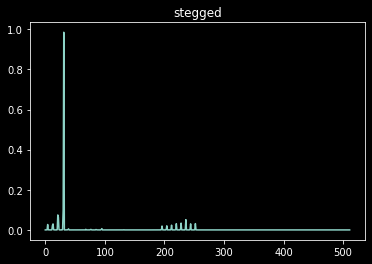

309

In [593]:
fun.drawhistrogram(X_Train_features,Y_Train_labels)


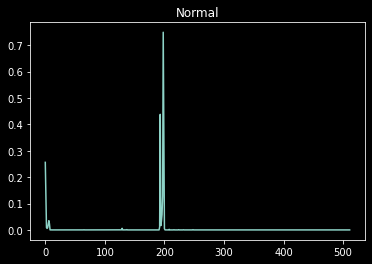

7

In [594]:
fun.drawhistrogram(X_small_Features,Y_small_labels)

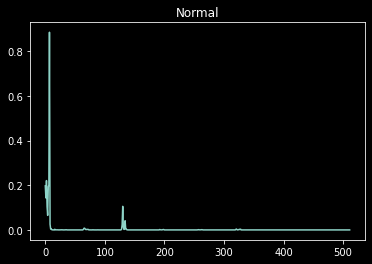

104

In [595]:
fun.drawhistrogram(X_mid_Features,Y_mid_labels)

# getting shape for model

In [596]:
image_Train_shape = X_Train_features.shape
image_Valid_shape = X_Valid_features.shape
image_Test_shape = X_Test_features.shape

#extracting number of rows, based on data set avalilable, this will be used to define the input shape of the MLP model
number_of_element_train, number_of_rows_train = image_Train_shape
number_of_element_valid, number_of_rows_valid = image_Valid_shape
number_of_element_test, number_of_rows_test = image_Test_shape

if number_of_rows_train == number_of_rows_valid == number_of_rows_test:
    input_shape=(number_of_rows_train,)
    print("Input shape has been set as ", input_shape)
else:
    print("check data set size, not compatible with this model or they all should be of equal size")


Input shape has been set as  (512,)


# creating models

# knn

In [597]:
from sklearn import metrics
scores = {}
scores_list = []
k_range = range(1,15)
for k in k_range:
    classifiers = KNeighborsClassifier(n_neighbors=k)
    classifiers.fit(X_Train_features,Y_Train_labels)
    y_prediction_test = classifiers.predict(X_Test_features)
    scores[k] = metrics.accuracy_score(Y_Test_labels,y_prediction_test)
    scores_list.append(metrics.accuracy_score(Y_Test_labels,y_prediction_test))

result = metrics.confusion_matrix(Y_Test_labels,y_prediction_test)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_Test_labels,y_prediction_test)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[59  1]
 [ 0 60]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        60

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Text(0, 0.5, 'Accuracy')

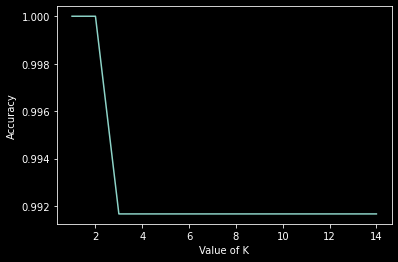

In [598]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [599]:
knn = KNeighborsClassifier(2)
knn.fit(X_Train_features,Y_Train_labels)

KNeighborsClassifier(n_neighbors=2)

In [600]:
# Make predictions
knn_y_train_prediction = knn.predict(X_Train_features)
knn_y_test_prediction = knn.predict(X_Test_features)

In [601]:
# Training set performance
knn_train_accuracy = accuracy_score(Y_Train_labels, knn_y_train_prediction) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(Y_Train_labels, knn_y_train_prediction) # Calculate MCC
knn_train_f1 = f1_score(Y_Train_labels, knn_y_train_prediction, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(Y_Test_labels, knn_y_test_prediction) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(Y_Test_labels, knn_y_test_prediction) # Calculate MCC
knn_test_f1 = f1_score(Y_Test_labels, knn_y_test_prediction, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.9989583333333333
- MCC: 0.9979188322914824
- F1 score: 0.9989583322030514
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [602]:
#print(knn_y_test_prediction)
#print(Y_Test_labels)
#fun.drawchart(Y_Test_labels, knn_y_test_prediction)
normal_actual_and_predicted_list = []
stagg_actual_and_predicted_list = []
knn_large_normal_actual_and_predicted_ratio, knn_large_stagg_actual_and_predicted_ratio = fun.drawchart(Y_Test_labels,knn_y_test_prediction)
print(knn_large_normal_actual_and_predicted_ratio)
print(knn_large_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# testing small set

In [603]:
knn_small_test_prediction = knn.predict(X_small_Features)

In [604]:
knn_small_accuracy = accuracy_score(Y_small_labels,knn_small_test_prediction) 
knn_small_mcc = matthews_corrcoef(Y_small_labels,knn_small_test_prediction)
knn_small_f1 = f1_score(Y_small_labels,knn_small_test_prediction,average='weighted')

In [605]:
print('Model performance for small Test set')
print('- Accuracy: %s' % knn_small_accuracy)
print('- MCC: %s' % knn_small_mcc)
print('- F1 score: %s' % knn_small_f1)

Model performance for small Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [606]:
knn_small_normal_actual_and_predicted_ratio,knn_small_stagg_actual_and_predicted_ratio=fun.drawchart(Y_small_labels,knn_small_test_prediction)
print(knn_small_normal_actual_and_predicted_ratio)
print(knn_small_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# mid set

In [607]:
knn_mid_set_prediction = knn.predict(X_mid_Features)

In [608]:
knn_mid_accuracy = accuracy_score(Y_mid_labels,knn_mid_set_prediction) 
knn_mid_mcc = matthews_corrcoef(Y_mid_labels,knn_mid_set_prediction)
knn_mid_f1 = f1_score(Y_mid_labels,knn_mid_set_prediction,average='weighted')

In [609]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % knn_mid_accuracy)
print('- MCC: %s' % knn_mid_mcc)
print('- F1 score: %s' % knn_mid_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [610]:
knn_mid_normal_actual_and_predicted_ratio,knn_mid_stagg_actual_and_predicted_ratio=fun.drawchart(Y_mid_labels,knn_mid_set_prediction)
print(knn_mid_normal_actual_and_predicted_ratio)
print(knn_mid_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# svm 

In [611]:
svm_linear = SVC(gamma=2,kernel='linear',C=1)

In [612]:

svm_linear.fit(X_Train_features,Y_Train_labels)

SVC(C=1, gamma=2, kernel='linear')

In [613]:
svm_y_train_prediction = svm_linear.predict(X_Train_features)
svm_y_test_prediction = svm_linear.predict(X_Test_features)

In [614]:
# Training set performance
svm_linear_train_accuracy = accuracy_score(Y_Train_labels, svm_y_train_prediction) # Calculate Accuracy
svm_linear_train_mcc = matthews_corrcoef(Y_Train_labels, svm_y_train_prediction) # Calculate MCC
svm_linear_train_f1 = f1_score(Y_Train_labels, svm_y_train_prediction, average='weighted') # Calculate F1-score

# Test set performance
svm_linear_test_accuracy = accuracy_score(Y_Test_labels, svm_y_test_prediction) # Calculate Accuracy
svm_linear_test_mcc = matthews_corrcoef(Y_Test_labels, svm_y_test_prediction) # Calculate MCC
svm_linear_test_f1 = f1_score(Y_Test_labels, svm_y_test_prediction, average='weighted') # Calculate F1-score


In [615]:
print('Model performance for Training set')
print('- Accuracy: %s' % svm_linear_train_accuracy)
print('- MCC: %s' % svm_linear_train_mcc)
print('- F1 score: %s' % svm_linear_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_linear_test_accuracy)
print('- MCC: %s' % svm_linear_test_mcc)
print('- F1 score: %s' % svm_linear_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [616]:
svm_large_normal_actual_and_predicted_ratio, svm_large_stagg_actual_and_predicted_ratio = fun.drawchart(Y_Test_labels,svm_y_test_prediction)
print(svm_large_normal_actual_and_predicted_ratio)
print(svm_large_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# small set

In [617]:
svm_linear_small_set_prediction = svm_linear.predict(X_small_Features)

In [618]:
svm_linear_small_accuracy = accuracy_score(Y_small_labels, svm_linear_small_set_prediction) # Calculate Accuracy
svm_linear_small_mcc = matthews_corrcoef(Y_small_labels, svm_linear_small_set_prediction) # Calculate MCC
svm_linear_small_f1 = f1_score(Y_small_labels, svm_linear_small_set_prediction, average='weighted') # Calculate F1-score


In [619]:
print('Model performance for Test set')
print('- Accuracy: %s' % svm_linear_small_accuracy)
print('- MCC: %s' % svm_linear_small_mcc)
print('- F1 score: %s' % svm_linear_small_f1)

Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [620]:
svm_small_normal_actual_and_predicted_ratio, svm_small_stagg_actual_and_predicted_ratio = fun.drawchart(Y_small_labels,svm_linear_small_set_prediction)
print(svm_small_normal_actual_and_predicted_ratio)
print(svm_small_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# mid set 

In [621]:
svm_linear_mid_prediction = svm_linear.predict(X_mid_Features)

In [622]:
svm_mid_accuracy = accuracy_score(Y_mid_labels,svm_linear_mid_prediction)
svm_mid_mcc = matthews_corrcoef(Y_mid_labels,svm_linear_mid_prediction)
svm_mid_f1 = f1_score(Y_mid_labels,svm_linear_mid_prediction, average='weighted')

In [623]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % svm_mid_accuracy)
print('- MCC: %s' % svm_mid_mcc)
print('- F1 score: %s' % svm_mid_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [624]:
svm_mid_normal_actual_and_predicted_ratio, svm_mid_stagg_actual_and_predicted_ratio = fun.drawchart(Y_mid_labels,svm_linear_mid_prediction)
print(svm_mid_normal_actual_and_predicted_ratio)
print(svm_mid_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# decision tree

In [625]:
dt = DecisionTreeClassifier(max_depth=5)


In [626]:
dt.fit(X_Train_features,Y_Train_labels)

DecisionTreeClassifier(max_depth=5)

In [627]:

dt_train_predicition = dt.predict(X_Train_features)
dt_test_prediction = dt.predict(X_Test_features)

In [628]:
#training set performance
dt_train_accuracy = accuracy_score(Y_Train_labels,dt_train_predicition)
dt_train_mcc = matthews_corrcoef(Y_Train_labels,dt_train_predicition)
dt_train_f1 = f1_score(Y_Train_labels,dt_train_predicition,average='weighted')

#Test set performace
dt_test_accuracy = accuracy_score(Y_Test_labels,dt_test_prediction)
dt_test_mcc = matthews_corrcoef(Y_Test_labels,dt_test_prediction)
dt_test_f1 = f1_score(Y_Test_labels,dt_test_prediction,average='weighted')

In [629]:
print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9833333333333333
- MCC: 0.9672041516493516
- F1 score: 0.9833287024173382


In [630]:
dt_large_normal_actual_and_predicted_ratio, dt_large_stagg_actual_and_predicted_ratio = fun.drawchart(Y_Test_labels,dt_test_prediction)
print(dt_large_normal_actual_and_predicted_ratio)
print(dt_large_stagg_actual_and_predicted_ratio)

[58, 60]
[60, 60]


# mid set

In [631]:
dt_mid_set_prediction = dt.predict(X_mid_Features)

In [632]:
dt_mid_accuracy = accuracy_score(Y_mid_labels,dt_mid_set_prediction)
dt_mid_mcc = matthews_corrcoef(Y_mid_labels,dt_mid_set_prediction)
dt_mid_f1 = f1_score(Y_mid_labels,dt_mid_set_prediction,average='weighted')

In [633]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % dt_mid_accuracy)
print('- MCC: %s' % dt_mid_mcc)
print('- F1 score: %s' % dt_mid_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [634]:
dt_mid_normal_actual_and_predicted_ratio, dt_mid_stagg_actual_and_predicted_ratio = fun.drawchart(Y_mid_labels,dt_mid_set_prediction)
print(dt_mid_normal_actual_and_predicted_ratio)
print(dt_mid_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# small set

In [635]:
dt_small_set_predicition = dt.predict(X_small_Features)

In [636]:
dt_small_accuracy = accuracy_score(Y_small_labels,dt_small_set_predicition)
dt_small_mcc = matthews_corrcoef(Y_small_labels,dt_small_set_predicition)
dt_small_f1 = f1_score(Y_small_labels,dt_small_set_predicition,average='weighted')

In [637]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % dt_small_accuracy)
print('- MCC: %s' % dt_small_mcc)
print('- F1 score: %s' % dt_small_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [638]:
dt_small_normal_actual_and_predicted_ratio, dt_small_stagg_actual_and_predicted_ratio = fun.drawchart(Y_small_labels,dt_small_set_predicition)
print(dt_small_normal_actual_and_predicted_ratio)
print(dt_small_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# random forest 

In [639]:
rf = RandomForestClassifier(n_estimators=10)

In [640]:
rf.fit(X_Train_features,Y_Train_labels)

RandomForestClassifier(n_estimators=10)

In [641]:
rf_train_prediction = rf.predict(X_Train_features)
rf_test_predition = rf.predict(X_Test_features)


In [642]:
#training set performace
rf_train_accuracy = accuracy_score(Y_Train_labels,rf_train_prediction)
rf_train_mcc = matthews_corrcoef(Y_Train_labels,rf_train_prediction)
rf_train_f1 = f1_score(Y_Train_labels,rf_train_prediction,average='weighted')

#test set performace
rf_test_accuracy = accuracy_score(Y_Test_labels,rf_test_predition) 
rf_test_mcc = matthews_corrcoef(Y_Test_labels,rf_test_predition)
rf_test_f1 = f1_score(Y_Test_labels,rf_test_predition, average='weighted')


In [643]:
print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [644]:
rf_large_normal_actual_and_predicted_ratio, rf_large_stagg_actual_and_predicted_ratio = fun.drawchart(Y_Test_labels,rf_test_predition)
print(rf_large_normal_actual_and_predicted_ratio)
print(rf_large_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# mid set

In [645]:
rf_mid_set_prediciton = rf.predict(X_mid_Features)

In [646]:
rf_mid_accuracy = accuracy_score(Y_mid_labels,rf_mid_set_prediciton) 
rf_mid_mcc = matthews_corrcoef(Y_mid_labels,rf_mid_set_prediciton)
rf_mid_f1 = f1_score(Y_mid_labels,rf_mid_set_prediciton,average='weighted')

In [647]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % rf_mid_accuracy)
print('- MCC: %s' % rf_mid_mcc)
print('- F1 score: %s' % rf_mid_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [648]:

rf_mid_normal_actual_and_predicted_ratio, rf_mid_stagg_actual_and_predicted_ratio = fun.drawchart(Y_mid_labels,rf_mid_set_prediciton)
print(rf_large_normal_actual_and_predicted_ratio)
print(rf_large_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# small set


In [649]:
rf_small_set_prediciton = rf.predict(X_small_Features)

In [650]:
rf_small_accuracy = accuracy_score(Y_small_labels,rf_small_set_prediciton) 
rf_small_mcc = matthews_corrcoef(Y_small_labels,rf_small_set_prediciton)
rf_small_f1 = f1_score(Y_small_labels,rf_small_set_prediciton,average='weighted')

In [651]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % rf_small_accuracy)
print('- MCC: %s' % rf_small_mcc)
print('- F1 score: %s' % rf_small_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [652]:

rf_small_normal_actual_and_predicted_ratio, rf_small_stagg_actual_and_predicted_ratio = fun.drawchart(Y_small_labels,rf_small_set_prediciton)
print(rf_small_normal_actual_and_predicted_ratio)
print(rf_small_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# mlp

In [653]:
mlp = MLPClassifier(hidden_layer_sizes=(512),activation='relu',solver='adam')

In [654]:
mlp.fit(X_Train_features,Y_Train_labels)

MLPClassifier(hidden_layer_sizes=512)

In [655]:
y_train_prediction = mlp.predict(X_Train_features)
y_test_prediction = mlp.predict(X_Test_features)

In [656]:
# Training set performance
mlp_train_accuracy = accuracy_score(Y_Train_labels, y_train_prediction) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(Y_Train_labels, y_train_prediction) # Calculate MCC
mlp_train_f1 = f1_score(Y_Train_labels, y_train_prediction, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(Y_Test_labels, y_test_prediction) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(Y_Test_labels, y_test_prediction) # Calculate MCC
mlp_test_f1 = f1_score(Y_Test_labels, y_test_prediction, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [657]:

mlp_large_normal_actual_and_predicted_ratio, mlp_large_stagg_actual_and_predicted_ratio = fun.drawchart(Y_Test_labels,y_test_prediction)
print(mlp_large_normal_actual_and_predicted_ratio)
print(mlp_large_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# mid testing

In [658]:
mlp_mid_prediction = mlp.predict(X_mid_Features)


In [659]:
# Test set performance
mlp_mid_accuracy = accuracy_score(Y_mid_labels, mlp_mid_prediction) # Calculate Accuracy
mlp_mid_mcc = matthews_corrcoef(Y_mid_labels, mlp_mid_prediction) # Calculate MCC
mlp_mid_f1 = f1_score(Y_mid_labels, mlp_mid_prediction, average='weighted') # Calculate F1-score


In [660]:
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_mid_accuracy)
print('- MCC: %s' % mlp_mid_mcc)
print('- F1 score: %s' % mlp_mid_f1)

----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [661]:

mlp_mid_normal_actual_and_predicted_ratio, mlp_mid_stagg_actual_and_predicted_ratio = fun.drawchart(Y_mid_labels,mlp_mid_prediction)
print(mlp_mid_normal_actual_and_predicted_ratio)
print(mlp_mid_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# small test

In [662]:
mlp_small_prediction = mlp.predict(X_small_Features)


In [663]:
# Test set performance
mlp_small_accuracy = accuracy_score(Y_small_labels, mlp_small_prediction) # Calculate Accuracy
mlp_small_mcc = matthews_corrcoef(Y_small_labels, mlp_small_prediction) # Calculate MCC
mlp_small_f1 = f1_score(Y_small_labels, mlp_small_prediction, average='weighted') # Calculate F1-score

In [664]:
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_small_accuracy)
print('- MCC: %s' % mlp_small_mcc)
print('- F1 score: %s' % mlp_small_f1)

----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [665]:
mlp_small_normal_actual_and_predicted_ratio, mlp_small_stagg_actual_and_predicted_ratio = fun.drawchart(Y_small_labels,mlp_small_prediction)
print(mlp_small_normal_actual_and_predicted_ratio)
print(mlp_small_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# Build Stacked Model

In [666]:
estimator_list = [
    ('knn',knn),
    ('svm_linear',svm_linear),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp)
]

# Build stack model

In [667]:
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [668]:
# train stcking model

stack_model.fit(X_Train_features,Y_Train_labels)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                               ('svm_linear',
                                SVC(C=1, gamma=2, kernel='linear')),
                               ('dt', DecisionTreeClassifier(max_depth=5)),
                               ('rf', RandomForestClassifier(n_estimators=10)),
                               ('mlp', MLPClassifier(hidden_layer_sizes=512))],
                   final_estimator=LogisticRegression())

In [669]:
stack_train_prediction = stack_model.predict(X_Train_features)
stack_test_prediction = stack_model.predict(X_Test_features)

In [670]:
# training set model performance
stack_model_train_accuracy = accuracy_score(Y_Train_labels,stack_train_prediction)
stack_model_train_mcc = matthews_corrcoef(Y_Train_labels,stack_train_prediction)
stack_model_train_f1 = f1_score(Y_Train_labels,stack_train_prediction, average='weighted')

In [671]:
#test set model performace
stack_model_test_accuracy = accuracy_score(Y_Test_labels,stack_test_prediction) 
stack_model_test_mcc = matthews_corrcoef(Y_Test_labels,stack_test_prediction)
stack_model_test_f1 = f1_score(Y_Test_labels,stack_test_prediction,average='weighted')


In [672]:
print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [673]:
stack_large_normal_actual_and_predicted_ratio, stack_large_stagg_actual_and_predicted_ratio = fun.drawchart(Y_Test_labels,stack_test_prediction)
print(stack_large_normal_actual_and_predicted_ratio)
print(stack_large_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# mid testing

In [674]:
stack_mid_prediction = stack_model.predict(X_mid_Features)

In [675]:
stack_mid_accuracy = accuracy_score(Y_mid_labels,stack_mid_prediction) 
stack_mid_mcc = matthews_corrcoef(Y_mid_labels,stack_mid_prediction)
stack_mid_f1 = f1_score(Y_mid_labels,stack_mid_prediction,average='weighted')

In [676]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % stack_mid_accuracy)
print('- MCC: %s' % stack_mid_mcc)
print('- F1 score: %s' % stack_mid_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [677]:

stack_mid_normal_actual_and_predicted_ratio, stack_mid_stagg_actual_and_predicted_ratio = fun.drawchart(Y_mid_labels,stack_mid_prediction)
print(stack_mid_normal_actual_and_predicted_ratio)
print(stack_mid_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# small test

In [678]:
stack_small_prediction = stack_model.predict(X_small_Features)

In [679]:
stack_small_accuracy = accuracy_score(Y_small_labels,stack_small_prediction) 
stack_small_mcc = matthews_corrcoef(Y_small_labels,stack_small_prediction)
stack_small_f1 = f1_score(Y_small_labels,stack_small_prediction,average='weighted')

In [680]:
print('Model performance for mid Test set')
print('- Accuracy: %s' % stack_small_accuracy)
print('- MCC: %s' % stack_small_mcc)
print('- F1 score: %s' % stack_small_f1)

Model performance for mid Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


In [681]:

stack_small_normal_actual_and_predicted_ratio, stack_small_stagg_actual_and_predicted_ratio = fun.drawchart(Y_small_labels,stack_small_prediction)
print(stack_small_normal_actual_and_predicted_ratio)
print(stack_small_stagg_actual_and_predicted_ratio)

[60, 60]
[60, 60]


# Results large set

In [682]:
# large set resutls
acc_test_list = {
    'knn':knn_test_accuracy,
    'svm_linear':svm_linear_test_accuracy,
    'dt':dt_test_accuracy,
    'rf':rf_test_accuracy,
    'mlp':mlp_test_accuracy,
    'stack':stack_model_test_accuracy
}

mcc_test_list = {
    'knn':knn_test_mcc,
    'svm_linear':svm_linear_test_mcc,
    'dt':dt_test_mcc,
    'rf':rf_test_mcc,
    'mlp':mlp_test_mcc,
    'stack':stack_model_test_mcc
}

f1_test_list = {
    'knn':knn_test_f1,
    'svm_linear':svm_linear_test_f1,
    'dt':dt_test_f1,
    'rf':rf_test_f1,
    'mlp':mlp_test_f1,
    'stack':stack_model_test_f1
}

normal_to_predicted_ratio_large_list = {
    'knn': fun.returnStringCombined(knn_large_normal_actual_and_predicted_ratio[0],knn_large_normal_actual_and_predicted_ratio[1]) ,
    'svm_linear': fun.returnStringCombined(svm_large_normal_actual_and_predicted_ratio[0],svm_large_normal_actual_and_predicted_ratio[1]),
    'dt': fun.returnStringCombined(dt_large_normal_actual_and_predicted_ratio[0],dt_large_normal_actual_and_predicted_ratio[1]),
    'rf': fun.returnStringCombined(rf_large_normal_actual_and_predicted_ratio[0],rf_large_normal_actual_and_predicted_ratio[1]),
    'mlp': fun.returnStringCombined(mlp_large_normal_actual_and_predicted_ratio[0],mlp_large_normal_actual_and_predicted_ratio[1]),
    'stack': fun.returnStringCombined(stack_large_normal_actual_and_predicted_ratio[0],stack_large_normal_actual_and_predicted_ratio[1])
}

stagged_to_predicted_ratio_large_list = {
    'knn': fun.returnStringCombined(knn_large_stagg_actual_and_predicted_ratio[0],knn_large_stagg_actual_and_predicted_ratio[1]),
    'svm_linear': fun.returnStringCombined(svm_large_stagg_actual_and_predicted_ratio[0],svm_large_stagg_actual_and_predicted_ratio[1]),
    'dt': fun.returnStringCombined(dt_large_stagg_actual_and_predicted_ratio[0],dt_large_stagg_actual_and_predicted_ratio[1]),
    'rf': fun.returnStringCombined(rf_large_stagg_actual_and_predicted_ratio[0],rf_large_stagg_actual_and_predicted_ratio[1]),
    'mlp': fun.returnStringCombined(mlp_large_stagg_actual_and_predicted_ratio[0],mlp_large_stagg_actual_and_predicted_ratio[1]),
    'stack':fun.returnStringCombined(stack_large_stagg_actual_and_predicted_ratio[0],stack_large_stagg_actual_and_predicted_ratio[1])
}
print(acc_test_list)
print(mcc_test_list)
print(f1_test_list)
print(normal_to_predicted_ratio_large_list)
print(stagged_to_predicted_ratio_large_list)

{'knn': 1.0, 'svm_linear': 1.0, 'dt': 0.9833333333333333, 'rf': 1.0, 'mlp': 1.0, 'stack': 1.0}
{'knn': 1.0, 'svm_linear': 1.0, 'dt': 0.9672041516493516, 'rf': 1.0, 'mlp': 1.0, 'stack': 1.0}
{'knn': 1.0, 'svm_linear': 1.0, 'dt': 0.9833287024173382, 'rf': 1.0, 'mlp': 1.0, 'stack': 1.0}
{'knn': '60/60', 'svm_linear': '60/60', 'dt': '58/60', 'rf': '60/60', 'mlp': '60/60', 'stack': '60/60'}
{'knn': '60/60', 'svm_linear': '60/60', 'dt': '60/60', 'rf': '60/60', 'mlp': '60/60', 'stack': '60/60'}


In [683]:


acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy Large'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC Large'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1-score Large'])
normal_df = pd.DataFrame.from_dict(normal_to_predicted_ratio_large_list, orient='index',columns=['Predicted Normal / Actual  Normal Images'])
stagg_df = pd.DataFrame.from_dict(stagged_to_predicted_ratio_large_list, orient='index',columns=['Predicted stagged / Actual  Stagged Images'])
DF_LARGE = pd.concat([acc_df, mcc_df, f1_df,normal_df,stagg_df], axis=1)



In [684]:
DF_LARGE

,Accuracy Large,MCC Large,F1-score Large,Predicted Normal / Actual Normal Images,Predicted stagged / Actual Stagged Images
knn,1.000000,1.000000,1.000000,60/60,60/60
svm_linear,1.000000,1.000000,1.000000,60/60,60/60
dt,0.983333,0.967204,0.983329,58/60,60/60
rf,1.000000,1.000000,1.000000,60/60,60/60
mlp,1.000000,1.000000,1.000000,60/60,60/60
stack,1.000000,1.000000,1.000000,60/60,60/60


# Results of mid set

classficiation

    'knn':,
    'svm_linear':,
    'dt':,
    'rf':,
    'mlp':,
    'stack':

In [685]:
acc_mid_test_list = {
    'knn': knn_mid_accuracy,
    'svm_linear': svm_mid_accuracy,
    'dt': dt_mid_accuracy,
    'rf': rf_mid_accuracy,
    'mlp': mlp_mid_accuracy,
    'stack': stack_mid_accuracy
}

mcc_mid_test_list = {
    'knn': knn_mid_mcc,
    'svm_linear': svm_mid_mcc,
    'dt': dt_mid_mcc,
    'rf': rf_mid_mcc,
    'mlp': mlp_mid_mcc,
    'stack': stack_mid_mcc
}

f1_mid_test_list = {
    'knn': knn_mid_f1,
    'svm_linear': svm_mid_f1,
    'dt': dt_mid_f1,
    'rf': rf_mid_f1,
    'mlp': mlp_mid_f1,
    'stack': stack_mid_f1
}

normal_to_predicted_ratio_mid_list = {
    'knn': fun.returnStringCombined(knn_mid_normal_actual_and_predicted_ratio[0],knn_mid_normal_actual_and_predicted_ratio[1]) ,
    'svm_linear': fun.returnStringCombined(svm_mid_normal_actual_and_predicted_ratio[0],svm_mid_normal_actual_and_predicted_ratio[1]),
    'dt': fun.returnStringCombined(dt_mid_normal_actual_and_predicted_ratio[0],dt_mid_normal_actual_and_predicted_ratio[1]),
    'rf': fun.returnStringCombined(rf_mid_normal_actual_and_predicted_ratio[0],rf_mid_normal_actual_and_predicted_ratio[1]),
    'mlp': fun.returnStringCombined(mlp_mid_normal_actual_and_predicted_ratio[0],mlp_mid_normal_actual_and_predicted_ratio[1]),
    'stack': fun.returnStringCombined(stack_mid_normal_actual_and_predicted_ratio[0],stack_mid_normal_actual_and_predicted_ratio[1])
}

stagged_to_predicted_ratio_mid_list = {
    'knn': fun.returnStringCombined(knn_mid_stagg_actual_and_predicted_ratio[0],knn_mid_stagg_actual_and_predicted_ratio[1]),
    'svm_linear': fun.returnStringCombined(svm_mid_stagg_actual_and_predicted_ratio[0],svm_mid_stagg_actual_and_predicted_ratio[1]),
    'dt': fun.returnStringCombined(dt_mid_stagg_actual_and_predicted_ratio[0],dt_mid_stagg_actual_and_predicted_ratio[1]),
    'rf': fun.returnStringCombined(rf_mid_stagg_actual_and_predicted_ratio[0],rf_mid_stagg_actual_and_predicted_ratio[1]),
    'mlp': fun.returnStringCombined(mlp_mid_stagg_actual_and_predicted_ratio[0],mlp_mid_stagg_actual_and_predicted_ratio[1]),
    'stack':fun.returnStringCombined(stack_mid_stagg_actual_and_predicted_ratio[0],stack_mid_stagg_actual_and_predicted_ratio[1])
}

In [686]:
acc_mid_df = pd.DataFrame.from_dict(acc_mid_test_list,orient='index',columns = ['Accuracy Mid'])
mcc_mid_df = pd.DataFrame.from_dict(mcc_mid_test_list,orient='index',columns = ['MCC Mid'])
f1_mid_df =  pd.DataFrame.from_dict(f1_mid_test_list,orient='index',columns = ['F1-score Mid'])
normal_mid_df = pd.DataFrame.from_dict(normal_to_predicted_ratio_mid_list, orient='index',columns=['Predicted Normal / Actual  Normal Images'])
stagg_mid_df = pd.DataFrame.from_dict(stagged_to_predicted_ratio_mid_list, orient='index',columns=['Predicted stagged / Actual  Stagged Images'])
DF_MID = pd.concat([acc_mid_df,mcc_mid_df,f1_mid_df,normal_mid_df,stagg_mid_df],axis=1)
DF_MID


,Accuracy Mid,MCC Mid,F1-score Mid,Predicted Normal / Actual Normal Images,Predicted stagged / Actual Stagged Images
knn,1.0,1.0,1.0,60/60,60/60
svm_linear,1.0,1.0,1.0,60/60,60/60
dt,1.0,1.0,1.0,60/60,60/60
rf,1.0,1.0,1.0,60/60,60/60
mlp,1.0,1.0,1.0,60/60,60/60
stack,1.0,1.0,1.0,60/60,60/60


# Results small test

In [687]:
acc_small_test_list = {
    'knn': knn_small_accuracy,
    'svm_linear': svm_linear_small_accuracy,
    'dt': dt_small_accuracy,
    'rf': rf_small_accuracy,
    'mlp': mlp_small_accuracy,
    'stack': stack_small_accuracy
}

mcc_small_test_list = {
    'knn': knn_small_mcc,
    'svm_linear': svm_linear_small_mcc,
    'dt': dt_small_mcc,
    'rf': rf_small_mcc,
    'mlp': mlp_small_mcc,
    'stack': stack_small_mcc
}

f1_small_test_list = {
    'knn': knn_small_f1,
    'svm_linear': svm_linear_small_f1,
    'dt': dt_small_f1,
    'rf': rf_small_f1,
    'mlp': mlp_small_f1,
    'stack': stack_small_f1
}

normal_to_predicted_ratio_small_list = {
    'knn': fun.returnStringCombined(knn_small_normal_actual_and_predicted_ratio[0],knn_small_normal_actual_and_predicted_ratio[1]) ,
    'svm_linear': fun.returnStringCombined(svm_small_normal_actual_and_predicted_ratio[0],svm_small_normal_actual_and_predicted_ratio[1]),
    'dt': fun.returnStringCombined(dt_small_normal_actual_and_predicted_ratio[0],dt_small_normal_actual_and_predicted_ratio[1]),
    'rf': fun.returnStringCombined(rf_small_normal_actual_and_predicted_ratio[0],rf_small_normal_actual_and_predicted_ratio[1]),
    'mlp': fun.returnStringCombined(mlp_small_normal_actual_and_predicted_ratio[0],mlp_small_normal_actual_and_predicted_ratio[1]),
    'stack': fun.returnStringCombined(stack_small_normal_actual_and_predicted_ratio[0],stack_small_normal_actual_and_predicted_ratio[1])
}

stagged_to_predicted_ratio_small_list = {
    'knn': fun.returnStringCombined(knn_small_stagg_actual_and_predicted_ratio[0],knn_small_stagg_actual_and_predicted_ratio[1]),
    'svm_linear': fun.returnStringCombined(svm_small_stagg_actual_and_predicted_ratio[0],svm_small_stagg_actual_and_predicted_ratio[1]),
    'dt': fun.returnStringCombined(dt_small_stagg_actual_and_predicted_ratio[0],dt_small_stagg_actual_and_predicted_ratio[1]),
    'rf': fun.returnStringCombined(rf_small_stagg_actual_and_predicted_ratio[0],rf_small_stagg_actual_and_predicted_ratio[1]),
    'mlp': fun.returnStringCombined(mlp_small_stagg_actual_and_predicted_ratio[0],mlp_small_stagg_actual_and_predicted_ratio[1]),
    'stack':fun.returnStringCombined(stack_small_stagg_actual_and_predicted_ratio[0],stack_small_stagg_actual_and_predicted_ratio[1])
}

In [688]:
acc_small_df = pd.DataFrame.from_dict(acc_small_test_list,orient='index',columns = ['Accuracy Small'])
mcc_small_df = pd.DataFrame.from_dict(mcc_small_test_list,orient='index',columns = ['MCC Small'])
f1_small_df =  pd.DataFrame.from_dict(f1_small_test_list,orient='index',columns = ['F1 Small'])
normal_small_df = pd.DataFrame.from_dict(normal_to_predicted_ratio_small_list, orient='index',columns=['Predicted Normal / Actual  Normal Images'])
stagg_small_df = pd.DataFrame.from_dict(stagged_to_predicted_ratio_small_list, orient='index',columns=['Predicted stagged / Actual  Stagged Images'])
DF_SMALL = pd.concat([acc_small_df,mcc_small_df,f1_small_df,normal_small_df,stagg_small_df],axis=1)
DF_SMALL


,Accuracy Small,MCC Small,F1 Small,Predicted Normal / Actual Normal Images,Predicted stagged / Actual Stagged Images
knn,1.0,1.0,1.0,60/60,60/60
svm_linear,1.0,1.0,1.0,60/60,60/60
dt,1.0,1.0,1.0,60/60,60/60
rf,1.0,1.0,1.0,60/60,60/60
mlp,1.0,1.0,1.0,60/60,60/60
stack,1.0,1.0,1.0,60/60,60/60


In [689]:
main_save_location = "C:\\Users\\pskavalekar\\Desktop\\Scripts\\classifiers\\mlp\\jupyter Notebook\\"
type_save = ['captured data','semi-captured','internet set']
algorithm = ['lsb','lsbran','dct']
largeFileName= type_save[2]+' large'+'.csv'
midFileName= type_save[2]+' mid'+'.csv'
smallFileName= type_save[2]+' small'+'.csv'

main_Types = os.path.join(main_save_location,type_save[2])
main_algorith = os.path.join(main_Types,algoithm[2])

full_file_path_large = os.path.join(main_algorith,largeFileName)
full_file_path_mid = os.path.join(main_algorith,midFileName)
full_file_path_small = os.path.join(main_algorith,smallFileName)
print(full_file_path_large)
print(full_file_path_mid)
print(full_file_path_small)


C:\Users\pskavalekar\Desktop\Scripts\classifiers\mlp\jupyter Notebook\internet set\dct\internet set large.csv
C:\Users\pskavalekar\Desktop\Scripts\classifiers\mlp\jupyter Notebook\internet set\dct\internet set mid.csv
C:\Users\pskavalekar\Desktop\Scripts\classifiers\mlp\jupyter Notebook\internet set\dct\internet set small.csv


In [690]:
DF_LARGE.to_csv(full_file_path_large)

In [691]:
DF_MID.to_csv(full_file_path_mid)

In [692]:
DF_SMALL.to_csv(full_file_path_small)

In [24]:

large_name = 'captured datalarge.csv'
mid_name ='captured datamid.csv'
small_name = 'captured datasmall.csv'

fun.pathExists('C:\\Users\\pskavalekar\\Desktop\\Scripts\\classifiers\\mlp\\jupyter Notebook\\captured data\\lsb\\captured datalarge.csv')

Yes


In [29]:
df_large = pd.read_csv('C:\\Users\\pskavalekar\\Desktop\\Scripts\\classifiers\\mlp\\jupyter Notebook\\captured data\\dct\\'+large_name)
df_mid = pd.read_csv('C:\\Users\\pskavalekar\\Desktop\\Scripts\\classifiers\\mlp\\jupyter Notebook\\captured data\\dct\\'+mid_name)
df_small = pd.read_csv('C:\\Users\\pskavalekar\\Desktop\\Scripts\\classifiers\\mlp\\jupyter Notebook\\captured data\\dct\\'+small_name)



In [30]:
df_large

,classifiers,Accuracy Large,MCC Large,F1-score Large,Predicted Normal / Actual Normal Images,Predicted stagged / Actual Stagged Images
0,knn,1.000000,1.000000,1.000000,59/59,58/58
1,svm_linear,1.000000,1.000000,1.000000,59/59,58/58
2,dt,0.982906,0.966365,0.982898,59/59,56/58
3,rf,1.000000,1.000000,1.000000,59/59,58/58
4,mlp,1.000000,1.000000,1.000000,59/59,58/58
5,stack,1.000000,1.000000,1.000000,59/59,58/58


In [31]:
df_mid

,classifiers,Accuracy Mid,MCC Mid,F1-score Mid,Predicted Normal / Actual Normal Images,Predicted stagged / Actual Stagged Images
0,knn,1.0,1.0,1.0,60/60,60/60
1,svm_linear,1.0,1.0,1.0,60/60,60/60
2,dt,1.0,1.0,1.0,60/60,60/60
3,rf,1.0,1.0,1.0,60/60,60/60
4,mlp,1.0,1.0,1.0,60/60,60/60
5,stack,1.0,1.0,1.0,60/60,60/60


In [32]:
df_small

,classifiers,Accuracy small,MCC small,F1-score small,Predicted Normal / Actual Normal Images,Predicted stagged / Actual Stagged Images
0,knn,1.0,1.0,1.0,60/60,60/60
1,svm_linear,1.0,1.0,1.0,60/60,60/60
2,dt,1.0,1.0,1.0,60/60,60/60
3,rf,1.0,1.0,1.0,60/60,60/60
4,mlp,1.0,1.0,1.0,60/60,60/60
5,stack,1.0,1.0,1.0,60/60,60/60
